In [123]:
import numpy as np

In [124]:
import pandas as pd

In [213]:
import matplotlib.pyplot as plt

In [214]:
import seaborn as sns

In [127]:
count_df = pd.read_csv('/Users/kinam/git/obds_sep2022/Python_W2/2.2a_ex1_featurecounts.tsv', sep ='\t', header = 0, comment = '#') 

In [128]:
count_df.head()

,Geneid,Chr,Start,End,Strand,Length,bam/RS411-nasc-1.bam,bam/RS411-nasc-2.bam,bam/RS411-nasc-3.bam,bam/SEM-nasc-1.bam,bam/SEM-nasc-2.bam,bam/SEM-nasc-3.bam
0,DDX11L1,chr1;chr1;chr1,11874;12613;13221,12227;12721;14409,+;+;+,1652,9,6,8,8,8,6
1,WASH7P,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14362;14970;15796;16607;16858;17233;17606;1791...,14829;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1769,132,86,105,93,102,135
2,FAM138A,chr1;chr1;chr1;chr19;chr19;chr19,34611;35277;35721;76220;76886;77330,35174;35481;36081;76783;77090;77690,-;-;-;-;-;-,2260,0,0,0,0,0,0
3,FAM138F,chr1;chr1;chr1;chr19;chr19;chr19,34611;35277;35721;76220;76886;77330,35174;35481;36081;76783;77090;77690,-;-;-;-;-;-,2260,0,0,0,0,0,0
4,OR4F5,chr1,69091,70008,+,918,0,0,0,0,0,0


In [129]:
count_df.shape

(23710, 12)

In [202]:
count_df_2 = count_df.drop(['Chr', 'Start', 'End', 'Strand', 'Length'], axis = 1)

In [167]:
count_df_2.head()

,Geneid,bam/RS411-nasc-1.bam,bam/RS411-nasc-2.bam,bam/RS411-nasc-3.bam,bam/SEM-nasc-1.bam,bam/SEM-nasc-2.bam,bam/SEM-nasc-3.bam
0,DDX11L1,9,6,8,8,8,6
1,WASH7P,132,86,105,93,102,135
2,FAM138A,0,0,0,0,0,0
3,FAM138F,0,0,0,0,0,0
4,OR4F5,0,0,0,0,0,0


In [132]:
count_df_2.shape

(23710, 7)

In [ ]:
## def rename_df(str):
    

In [203]:
column_2 = count_df_2.columns.str.replace("bam/", "").str.replace(".bam", "").str.replace("-nasc", "")

/var/folders/b_/drg8gqvj38n0vbrfqvqz3k1c0000gn/T/ipykernel_52831/1374822713.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  column_2 = count_df_2.columns.str.replace("bam/", "").str.replace(".bam", "").str.replace("-nasc", "")


In [205]:
column_2

Index(['Geneid', 'RS411-1', 'RS411-2', 'RS411-3', 'SEM-1', 'SEM-2', 'SEM-3'], dtype='object')

In [206]:
count_df_2.columns = column_2

In [207]:
count_df_2.head()

,Geneid,RS411-1,RS411-2,RS411-3,SEM-1,SEM-2,SEM-3
0,DDX11L1,9,6,8,8,8,6
1,WASH7P,132,86,105,93,102,135
2,FAM138A,0,0,0,0,0,0
3,FAM138F,0,0,0,0,0,0
4,OR4F5,0,0,0,0,0,0


In [208]:
count_df_2 = count_df_2.set_index("Geneid")

In [209]:
count_df_2 = count_df_2.assign(row_sum = count_df_2.sum(axis = 1))

In [210]:
count_df_2.head()

,RS411-1,RS411-2,RS411-3,SEM-1,SEM-2,SEM-3,row_sum
Geneid,,,,,,,
DDX11L1,9,6,8,8,8,6,45
WASH7P,132,86,105,93,102,135,653
FAM138A,0,0,0,0,0,0,0
FAM138F,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0


In [211]:
count_df_2 = count_df_2.query('row_sum > 10')

In [212]:
count_df_2.head()

,RS411-1,RS411-2,RS411-3,SEM-1,SEM-2,SEM-3,row_sum
Geneid,,,,,,,
DDX11L1,9,6,8,8,8,6,45
WASH7P,132,86,105,93,102,135,653
LOC100133331,86,72,73,69,26,62,388
LOC100288069,58,46,52,36,55,32,279
LINC00115,69,74,86,69,75,77,450


In [216]:
count_df_plot = count_df_2.drop(['row_sum'], axis = 1)

In [217]:
count_df_plot.head()

,RS411-1,RS411-2,RS411-3,SEM-1,SEM-2,SEM-3
Geneid,,,,,,
DDX11L1,9,6,8,8,8,6
WASH7P,132,86,105,93,102,135
LOC100133331,86,72,73,69,26,62
LOC100288069,58,46,52,36,55,32
LINC00115,69,74,86,69,75,77


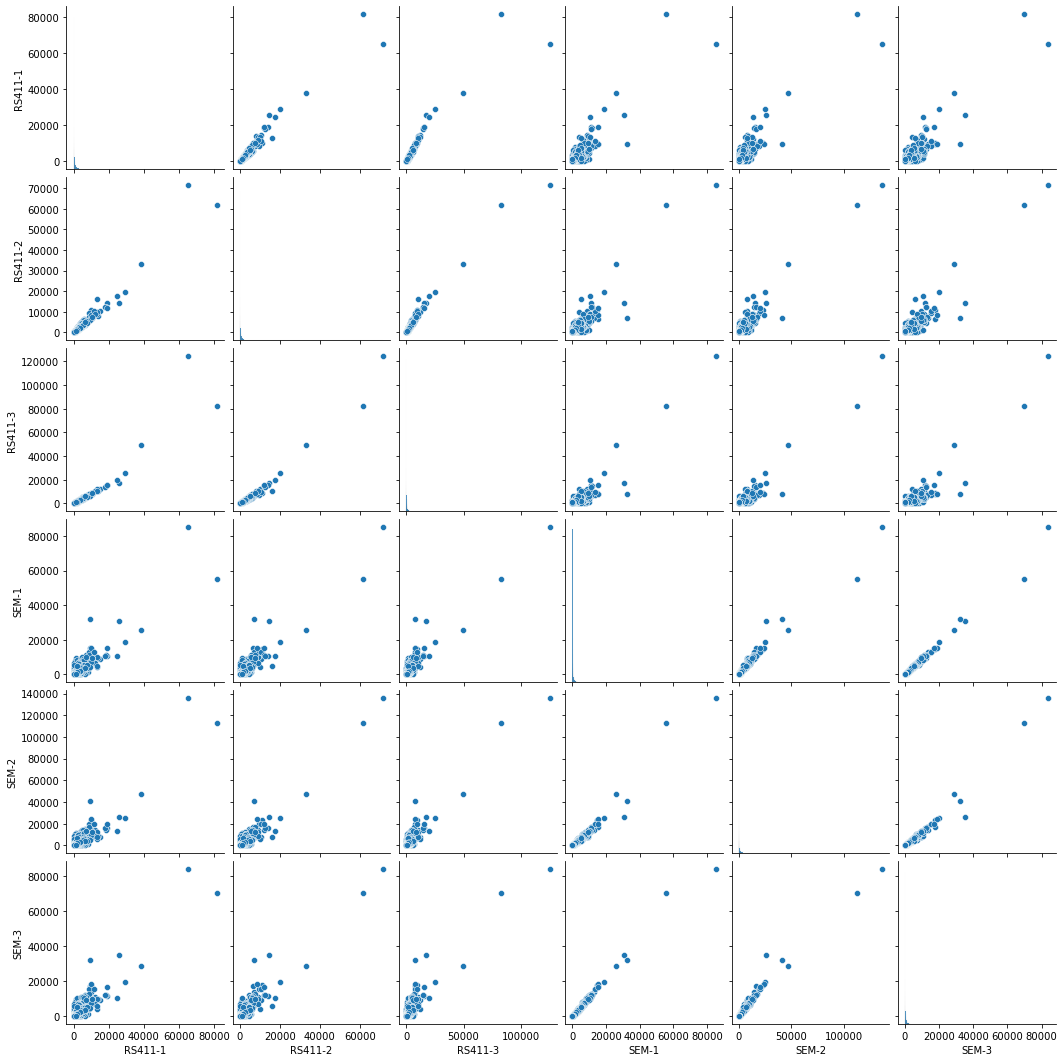

In [221]:
sns.pairplot(count_df_plot)

In [ ]:
# Tidy data - convert to long format

In [227]:
count_df_plot = count_df_plot.reset_index() #Reset the index 

In [319]:
count_df_tidy = count_df_plot.melt(id_vars = ["Geneid"], var_name = "sample_type", value_name = "count")

In [229]:
count_df_plot.head()

,Geneid,RS411-1,RS411-2,RS411-3,SEM-1,SEM-2,SEM-3
0,DDX11L1,9,6,8,8,8,6
1,WASH7P,132,86,105,93,102,135
2,LOC100133331,86,72,73,69,26,62
3,LOC100288069,58,46,52,36,55,32
4,LINC00115,69,74,86,69,75,77


In [305]:
count_df_tidy.tail()

,Geneid,sample_type,count
97555,TMLHE-AS1,SEM-3,4
97556,TMLHE,SEM-3,86
97557,IL9R,SEM-3,1
97558,PRKY,SEM-3,1
97559,CD24,SEM-3,21


(0.0, 1000.0)

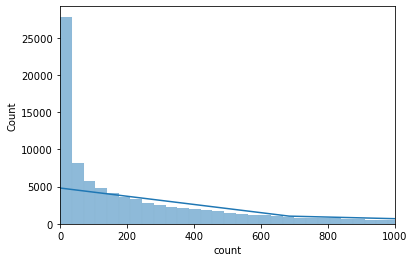

In [247]:
sns.histplot(data = count_df_tidy, x = "count", kde = True, binwidth = 35)
plt.xlim(0, 1000)

(-1000.0, 5000.0)

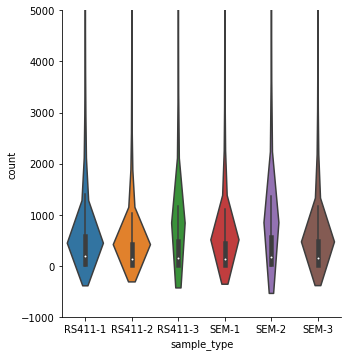

In [254]:
# Violin plot
plot_v = sns.catplot(data = count_df_tidy, x = "sample_type", y = "count" ,  kind = "violin")
plt.ylim(-1000, 5000)

In [267]:
sample_type = count_df_tidy.groupby("sample_type")

In [268]:
type(sample_type)

pandas.core.groupby.generic.DataFrameGroupBy

In [269]:
sample_type.head()

,Geneid,sample_type,count
0,DDX11L1,RS411-1,9
1,WASH7P,RS411-1,132
2,LOC100133331,RS411-1,86
3,LOC100288069,RS411-1,58
4,LINC00115,RS411-1,69
16260,DDX11L1,RS411-2,6
16261,WASH7P,RS411-2,86
16262,LOC100133331,RS411-2,72
16263,LOC100288069,RS411-2,46
16264,LINC00115,RS411-2,74


In [320]:
count_df_tidy.sort_values('count', ascending=False).groupby('sample_type').head(10).sort_values(['sample_type','count'], ascending = False)

,Geneid,sample_type,count
91046,MIR663A,SEM-3,84013
91347,MIR3648,SEM-3,69978
84095,MALAT1,SEM-3,35019
85454,PAN3,SEM-3,31976
91348,MIR3687,SEM-3,28825
88436,ACTG1,SEM-3,19700
94274,HIST1H1D,SEM-3,18637
94253,HIST1H3B,SEM-3,17754
85970,ZFP36L1,SEM-3,17353
95076,ACTB,SEM-3,16895


In [280]:
## calculate sum of counts per sample using groupby and merging the df's
df_total_counts = count_df_tidy.groupby("sample_type")["count"].sum().reset_index()
df_total_counts = df_total_counts.rename(columns = {"count": "total_count"})
df_total_counts
df_total_counts_merged = count_df_tidy.merge(df_total_counts, on = "sample_type")
df_total_counts_merged
df_total_counts_merged["cpm"] = (df_total_counts_merged["count"]/df_total_counts_merged["total_count"])*1e6
df_total_counts_merged

,Geneid,sample_type,count,total_count,cpm
0,DDX11L1,RS411-1,9,8593750,1.047273
1,WASH7P,RS411-1,132,8593750,15.360000
2,LOC100133331,RS411-1,86,8593750,10.007273
3,LOC100288069,RS411-1,58,8593750,6.749091
4,LINC00115,RS411-1,69,8593750,8.029091
...,...,...,...,...,...
97555,TMLHE-AS1,SEM-3,4,7464635,0.535860
97556,TMLHE,SEM-3,86,7464635,11.520992
97557,IL9R,SEM-3,1,7464635,0.133965
97558,PRKY,SEM-3,1,7464635,0.133965


In [321]:
## calculate sum of counts per sample using transform ()
count_df_tidy["total_count"] = count_df_tidy.groupby("sample_type")["count"].transform("sum")
count_df_tidy["cpm"] = (count_df_tidy["count"]/count_df_tidy["total_count"])*1e6
count_df_tidy

,Geneid,sample_type,count,total_count,cpm
0,DDX11L1,RS411-1,9,8593750,1.047273
1,WASH7P,RS411-1,132,8593750,15.360000
2,LOC100133331,RS411-1,86,8593750,10.007273
3,LOC100288069,RS411-1,58,8593750,6.749091
4,LINC00115,RS411-1,69,8593750,8.029091
...,...,...,...,...,...
97555,TMLHE-AS1,SEM-3,4,7464635,0.535860
97556,TMLHE,SEM-3,86,7464635,11.520992
97557,IL9R,SEM-3,1,7464635,0.133965
97558,PRKY,SEM-3,1,7464635,0.133965


In [322]:
count_df_tidy["cpm"] = count_df_tidy["cpm"] + 1
count_df_tidy

,Geneid,sample_type,count,total_count,cpm
0,DDX11L1,RS411-1,9,8593750,2.047273
1,WASH7P,RS411-1,132,8593750,16.360000
2,LOC100133331,RS411-1,86,8593750,11.007273
3,LOC100288069,RS411-1,58,8593750,7.749091
4,LINC00115,RS411-1,69,8593750,9.029091
...,...,...,...,...,...
97555,TMLHE-AS1,SEM-3,4,7464635,1.535860
97556,TMLHE,SEM-3,86,7464635,12.520992
97557,IL9R,SEM-3,1,7464635,1.133965
97558,PRKY,SEM-3,1,7464635,1.133965


In [323]:
count_df_tidy["log_cpm"] = count_df_tidy["cpm"].apply(np.log)

In [324]:
count_df_tidy

,Geneid,sample_type,count,total_count,cpm,log_cpm
0,DDX11L1,RS411-1,9,8593750,2.047273,0.716509
1,WASH7P,RS411-1,132,8593750,16.360000,2.794839
2,LOC100133331,RS411-1,86,8593750,11.007273,2.398556
3,LOC100288069,RS411-1,58,8593750,7.749091,2.047576
4,LINC00115,RS411-1,69,8593750,9.029091,2.200452
...,...,...,...,...,...,...
97555,TMLHE-AS1,SEM-3,4,7464635,1.535860,0.429091
97556,TMLHE,SEM-3,86,7464635,12.520992,2.527407
97557,IL9R,SEM-3,1,7464635,1.133965,0.125720
97558,PRKY,SEM-3,1,7464635,1.133965,0.125720


In [ ]:
count_df_tidy = count_df_tidy.drop(["total count"], axis = 1)

In [326]:
count_df_tidy

,Geneid,sample_type,count,total_count,cpm,log_cpm
0,DDX11L1,RS411-1,9,8593750,2.047273,0.716509
1,WASH7P,RS411-1,132,8593750,16.360000,2.794839
2,LOC100133331,RS411-1,86,8593750,11.007273,2.398556
3,LOC100288069,RS411-1,58,8593750,7.749091,2.047576
4,LINC00115,RS411-1,69,8593750,9.029091,2.200452
...,...,...,...,...,...,...
97555,TMLHE-AS1,SEM-3,4,7464635,1.535860,0.429091
97556,TMLHE,SEM-3,86,7464635,12.520992,2.527407
97557,IL9R,SEM-3,1,7464635,1.133965,0.125720
97558,PRKY,SEM-3,1,7464635,1.133965,0.125720


In [327]:
count_df_tidy["variance"] = count_df_tidy.groupby("Geneid")["log_cpm"].transform("var")
count_df_tidy

,Geneid,sample_type,count,total_count,cpm,log_cpm,variance
0,DDX11L1,RS411-1,9,8593750,2.047273,0.716509,0.004198
1,WASH7P,RS411-1,132,8593750,16.360000,2.794839,0.021813
2,LOC100133331,RS411-1,86,8593750,11.007273,2.398556,0.183374
3,LOC100288069,RS411-1,58,8593750,7.749091,2.047576,0.031799
4,LINC00115,RS411-1,69,8593750,9.029091,2.200452,0.021951
...,...,...,...,...,...,...,...
97555,TMLHE-AS1,SEM-3,4,7464635,1.535860,0.429091,0.019285
97556,TMLHE,SEM-3,86,7464635,12.520992,2.527407,0.016939
97557,IL9R,SEM-3,1,7464635,1.133965,0.125720,0.061268
97558,PRKY,SEM-3,1,7464635,1.133965,0.125720,0.024211


In [328]:
count_df_tidy.sort_values('variance', ascending=False).groupby('Geneid').head(100)

,Geneid,sample_type,count,total_count,cpm,log_cpm,variance
8607,TRIB2,RS411-1,1,8593750,1.116364,0.110077,10.005728
73647,TRIB2,SEM-2,3421,9008818,380.739051,5.942114,10.005728
41127,TRIB2,RS411-3,1,7276398,1.137431,0.128772,10.005728
89907,TRIB2,SEM-3,2448,7464635,328.946376,5.795895,10.005728
57387,TRIB2,SEM-1,2390,7095659,337.825656,5.822530,10.005728
...,...,...,...,...,...,...,...
28812,SNHG4,RS411-2,418,6355624,66.768522,4.201232,0.000091
61332,SNHG4,SEM-1,462,7095659,66.110231,4.191324,0.000091
93852,SNHG4,SEM-3,488,7464635,66.374931,4.195319,0.000091
12552,SNHG4,RS411-1,573,8593750,67.676364,4.214737,0.000091


In [371]:
count_df_tidy_5 = count_df_tidy.nlargest(30, ["variance"])
count_df_tidy_5.head()

,Geneid,sample_type,count,total_count,cpm,log_cpm,variance
8607,TRIB2,RS411-1,1,8593750,1.116364,0.110077,10.005728
24867,TRIB2,RS411-2,0,6355624,1.000000,0.000000,10.005728
41127,TRIB2,RS411-3,1,7276398,1.137431,0.128772,10.005728
57387,TRIB2,SEM-1,2390,7095659,337.825656,5.822530,10.005728
73647,TRIB2,SEM-2,3421,9008818,380.739051,5.942114,10.005728


In [340]:
count_df_tidy_100 = count_df_tidy.nlargest(600, ["variance"])
count_df_tidy_100.shape

(600, 7)

In [357]:
count_df_tidy_pivot = count_df_tidy_100.pivot(index = 'Geneid', columns = 'sample_type', values = 'log_cpm')

In [358]:
count_df_tidy_pivot.head()

sample_type,RS411-1,RS411-2,RS411-3,SEM-1,SEM-2,SEM-3
Geneid,,,,,,
ADD2,0.110077,0.000000,0.000000,4.460668,4.271060,4.322152
AHR,0.110077,0.000000,0.000000,3.689828,3.685143,3.497042
AHRR,2.047576,2.108719,2.178557,5.621775,5.601963,5.610266
ANKRD18DP,0.000000,0.000000,0.000000,4.328553,4.208691,4.259799
ANPEP,0.873952,0.814802,1.245235,4.994292,4.722476,4.929528


In [359]:
count_df_tidy_pivot_1 = count_df_tidy_pivot.reset_index()


In [360]:
df_tidy = count_df_tidy_pivot_1.melt(id_vars = ["Geneid"], var_name = "sample_type", value_name = "log_cpm")


In [361]:
df_tidy.head()

,Geneid,sample_type,log_cpm
0,ADD2,RS411-1,0.110077
1,AHR,RS411-1,0.110077
2,AHRR,RS411-1,2.047576
3,ANKRD18DP,RS411-1,0.000000
4,ANPEP,RS411-1,0.873952


<AxesSubplot:xlabel='sample_type', ylabel='log_cpm'>

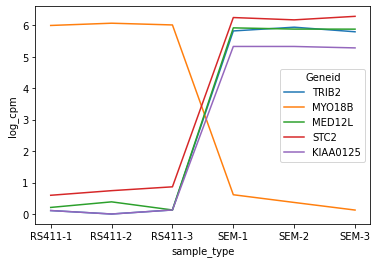

In [372]:
sns.lineplot(data = count_df_tidy_5, x = "sample_type", y = "log_cpm", hue = "Geneid")

In [368]:
top_5 = df_tidy.nlargest(30, ['log_cpm'])
top_5

,Geneid,sample_type,log_cpm
579,STC2,SEM-3,6.287234
379,STC2,SEM-1,6.249035
479,STC2,SEM-2,6.175121
153,MYO18B,RS411-2,6.068690
253,MYO18B,RS411-3,6.013456
53,MYO18B,RS411-1,5.997004
483,TRIB2,SEM-2,5.942114
348,MED12L,SEM-1,5.920601
448,MED12L,SEM-2,5.881727
548,MED12L,SEM-3,5.879831


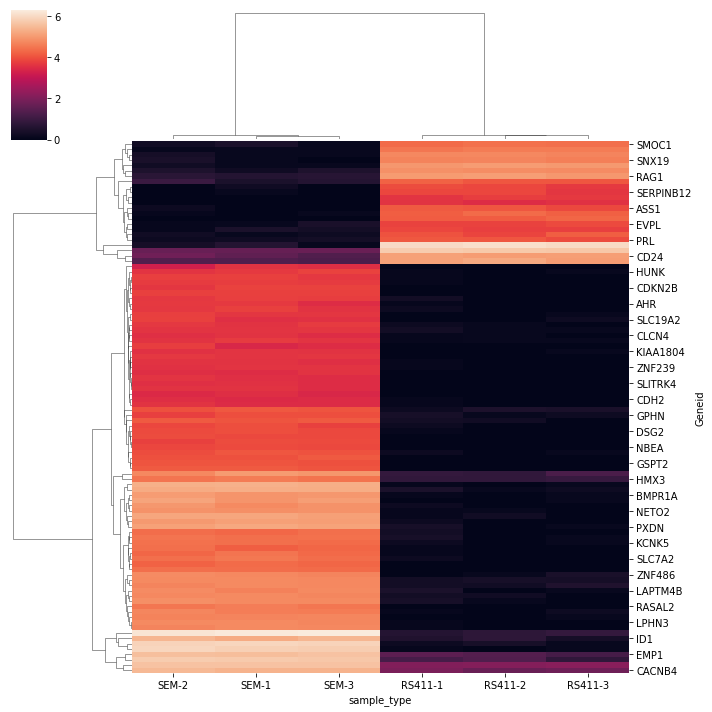

In [363]:
#Heatmap
heatmap_100 = sns.clustermap(count_df_tidy_pivot)
heatmap_100.savefig("heatmap_100.svg")